Classification using Tensor flow on MNIST cloth dataset

In [25]:
#library libraries
import tensorflow as tf
import matplotlib.pyplot as plt

In [26]:
#access the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [27]:
#print the training and test dataset
train_images.shape

(60000, 28, 28)

In [28]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [29]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [30]:
test_images.shape

(10000, 28, 28)

In [31]:
test_labels.shape

(10000,)

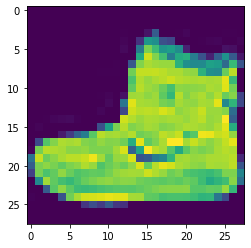

In [32]:
#visualization of training data
#plot the first train_image
plt.imshow(train_images[0])
plt.show()

In [33]:
?fashion_mnist

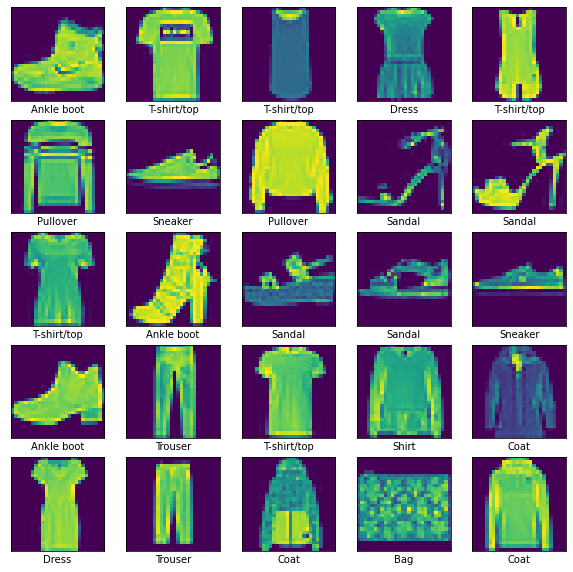

In [34]:
#plot multiple images and its label
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
               'Shirt','Sneaker','Bag','Ankle boot']

plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5, i +1)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [35]:
#scale images to a range of 0 to 1
train_images = train_images/255.0
test_images = test_images/255.0

In [36]:
#create model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(10,activation = 'softmax')
#     tf.keras.layers.Dense(10)
])

model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

#model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [47]:
#Train the Model
history = model.fit(train_images, train_labels, epochs = 10, validation_split = 0.3)

Epoch 1/10


C:\Users\gupta\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1313/1313 [==============================] - 8s 6ms/step - loss: 0.3887 - accuracy: 0.8638 - val_loss: 0.3806 - val_accuracy: 0.8692
Epoch 2/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3865 - accuracy: 0.8660 - val_loss: 0.4097 - val_accuracy: 0.8554
Epoch 3/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3843 - accuracy: 0.8674 - val_loss: 0.3990 - val_accuracy: 0.8602
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3827 - accuracy: 0.8655 - val_loss: 0.4079 - val_accuracy: 0.8564
Epoch 5/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3808 - accuracy: 0.8672 - val_loss: 0.3960 - val_accuracy: 0.8608
Epoch 6/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3779 - accuracy: 0.8684 - val_loss: 0.4246 - val_accuracy: 0.8531
Epoch 7/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3753 - accuracy: 0.8680 - val_loss: 0.4048 - val_accuracy: 0.8586
Epo

Text(0.5, 1.0, 'Training and Validation Loss')

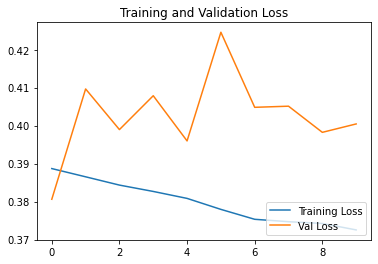

In [48]:
loss=history.history['loss']
acc=history.history['accuracy']

val_loss=history.history['val_loss']
val_acc=history.history['val_accuracy']


epochs_range=range(10)
plt.plot(epochs_range,loss,label= 'Training Loss')
plt.plot(epochs_range,val_loss,label= 'Val Loss')
plt.legend(loc='lower right') 
plt.title('Training and Validation Loss')

In [39]:
# Evaluate the accuracy 
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print( ' \Test accuracy: ' , test_acc)

313/313 - 1s - loss: 0.4560 - accuracy: 0.8417 - 1s/epoch - 4ms/step
 \Test accuracy:  0.84170001745224


In [50]:
y_pred = model.predict(test_images)

In [51]:
y_pred.shape

(10000, 10)

In [54]:
y_pred = [np.argmax(x) for x in y_pred]

In [58]:
from sklearn.metrics import confusion_matrix, f1_score

confusion_matrix(test_labels,y_pred)

array([[814,   3,  19,  42,   7,   0, 101,   0,  14,   0],
       [  3, 959,   6,  23,   5,   0,   3,   0,   1,   0],
       [ 18,   6, 797,   9, 105,   0,  53,   0,  12,   0],
       [ 30,  21,  22, 842,  41,   0,  34,   1,   9,   0],
       [  0,   2, 153,  24, 757,   0,  56,   0,   8,   0],
       [  0,   0,   0,   1,   0, 928,   0,  37,   4,  30],
       [143,   3, 170,  37, 113,   0, 511,   0,  23,   0],
       [  0,   0,   0,   0,   0,  46,   0, 905,   0,  49],
       [  4,   1,  10,   8,   2,   4,  17,   5, 949,   0],
       [  0,   0,   0,   0,   0,  10,   1,  24,   0, 965]], dtype=int64)

In [60]:
f1_score(test_labels,y_pred, average = 'weighted')

0.8407230195284287

In [40]:
# Predict
probability_model=tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images) 
predictions[0]

array([0.08771043, 0.08771037, 0.08771145, 0.08771085, 0.08771116,
       0.09945904, 0.08771318, 0.09657692, 0.08853753, 0.18915908],
      dtype=float32)

In [41]:
# view prediction
import numpy as np 
np.argmax(predictions[0])

9

In [42]:
test_labels[0]

9

In [43]:
#verify predictions
def plot_image(i, predictions_array, true_label, img) :
    true_label, img=true_label [i] , img[i]
    plt.grid(False) 
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img) 
    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label: 
        color = 'blue'
    else:
        color =  'red' 
    plt.xlabel("{}  {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array), 
                                  class_names[true_label]), 
                                  color=color) 

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i] 
    plt.grid(False) 
    plt.xticks(range(10))
    plt.yticks([]) 
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

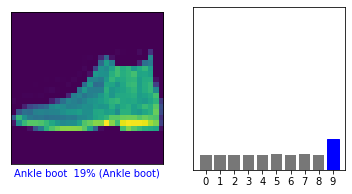

In [44]:
# Verify the 0th image prediction
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

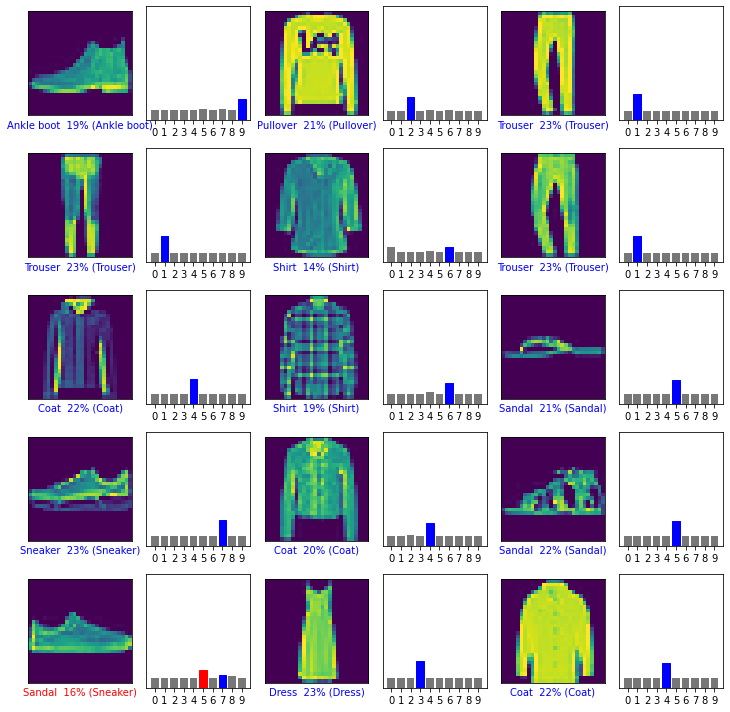

In [45]:
# plot images with their predictions
num_rows = 5 
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(10,10))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2) 
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()